In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')


In [3]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols.drop("target"):
    print(f"train : {df_train[col].describe()}\ntest : {df_test[col].describe()}\n")

train : count    156076.000000
mean      78037.500000
std       45055.404644
min           0.000000
25%       39018.750000
50%       78037.500000
75%      117056.250000
max      156075.000000
Name: index, dtype: float64
test : count    194330.000000
mean      97164.500000
std       56098.383243
min           0.000000
25%       48582.250000
50%       97164.500000
75%      145746.750000
max      194329.000000
Name: index, dtype: float64

train : count    156076.000000
mean         35.421710
std          58.834915
min          -3.220955
25%          -0.512021
50%           0.200537
75%         127.814373
max         146.519045
Name: 0, dtype: float64
test : count    194330.000000
mean          0.002194
std           1.005935
min          -3.748814
25%          -0.668087
50%          -0.221901
75%           0.427884
max          18.774325
Name: 0, dtype: float64

train : count    156076.000000
mean          0.797831
std           1.727812
min          -3.821917
25%          -0.430897
50%  

In [73]:
normal_count = (df_train["0"] < 100).sum()
all_count = (df_train["0"]<200).sum()

In [74]:
print(all_count,normal_count,all_count-normal_count)

156076 114514 41562


In [75]:
df = df_train[df_train["0"] < 100].reset_index(drop=True)

In [40]:
# 先取得所有欄位
all_columns = df_train.columns.tolist()

# 轉換為 0-based index
structure_indices = list(range(37, 97))
structure_columns = [all_columns[i] for i in structure_indices]

# 確保 target 存在於欄位中
target_column = 'target'  # 若實際名稱不同，請替換
if target_column not in all_columns:
    raise ValueError("請確認 target 欄位名稱是否正確")

# 加上 target 欄
structure_group = df_train[structure_columns + [target_column]]

# 結構資料欄位：從所有欄位中移除連續欄位（但保留 target）
continuous_columns = [col for col in all_columns if col not in structure_columns and col != target_column and col!="index"]
continuous_group = df_train[continuous_columns + [target_column]]


In [41]:
print("structure group:\n",structure_group.head(1))
print("continuous group:\n",continuous_group.head(1))

structure group:
     36   37   38   39   40   41   42   43   44   45  ...   87   88   89   90  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    91   92   93   94   95  target  
0  0.0  0.0  0.0  0.0  0.0       1  

[1 rows x 61 columns]
continuous group:
             0        1          2         3         4          5         6  \
0  135.264238  0.96551  47.412901 -4.445019  2.163096  31.048716  5.960718   

           7  8          9  ...        27        28      29         30  \
0  11.009821  1 -10.909779  ... -7.353494 -6.878082  4.3706  29.491294   

        31         32  33          34         35  target  
0  5.78592 -44.991886   2  276.206255 -27.545933       1  

[1 rows x 37 columns]


[{'0', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '1'}, {<class 'numpy.float64'>, '2'}, {'3', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '4'}, {'5', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '6'}, {'7', <class 'numpy.float64'>}, {'8', <class 'numpy.int64'>}, {'9', <class 'numpy.float64'>}, {'10', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '11'}, {<class 'numpy.float64'>, '12'}, {'13', <class 'numpy.float64'>}, {'14', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '15'}, {<class 'numpy.float64'>, '16'}, {'17', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '18'}, {<class 'numpy.float64'>, '19'}, {<class 'numpy.float64'>, '20'}, {'21', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '22'}, {'23', <class 'numpy.float64'>}, {<class 'numpy.float64'>, '24'}, {'25', <class 'numpy.int64'>}, {<class 'numpy.float64'>, '26'}, {'27', <class 'numpy.float64'>}, {'28', <class 'numpy.float64'>}, {'29', <class 'numpy.float64'>}, {<class 'numpy.float64'

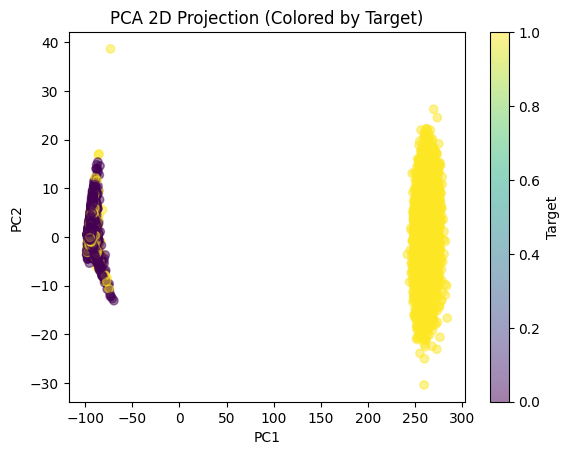

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 是 DataFrame，且包含 "target" 列
pca = PCA(n_components=2)  # 降成 2D
data_2d = pca.fit_transform(df.drop(["target"], axis=1))  # 排除 target 列

# df_local, df_dbscan, df_isoF
# 根据 target 值（0 或 1）设置颜色
plt.scatter(
    data_2d[:, 0], 
    data_2d[:, 1], 
    c=df["target"],  # 用 target 值映射颜色
    cmap="viridis",  # 颜色映射方案（也可用 "coolwarm"、"rainbow" 等）
    alpha=0.5
)

plt.title("PCA 2D Projection (Colored by Target)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Target")  # 添加颜色条
plt.show()

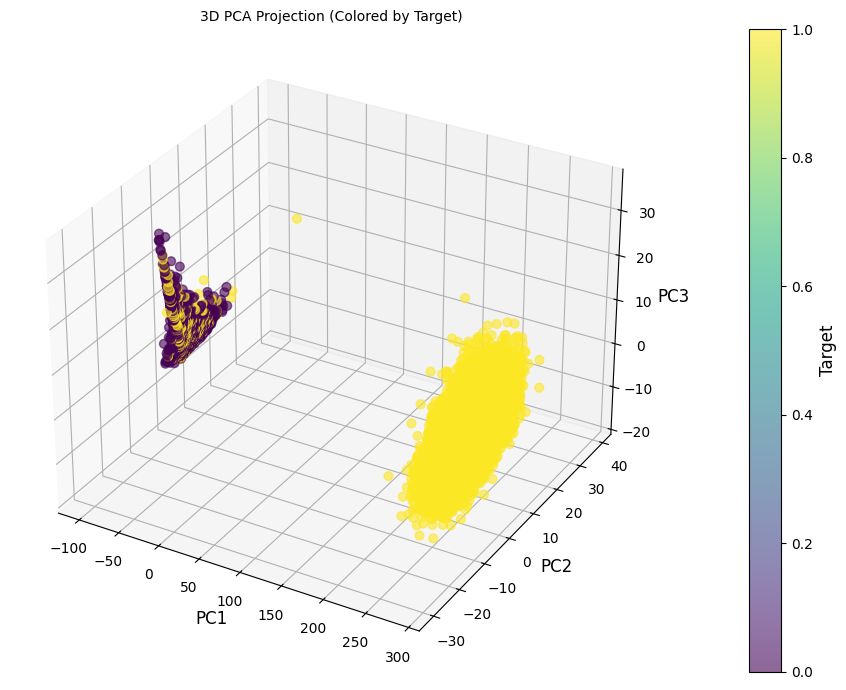

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 導入 3D 繪圖工具
from sklearn.decomposition import PCA

# 假設 df 是 DataFrame，且包含 "target" 列
pca = PCA(n_components=3)  # 降成 3D
data_3d = pca.fit_transform(df.drop(["target", "tmp"], axis=1))  # 排除不需要的列

# 創建 3D 圖形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # 啟用 3D 模式

# 繪製散點圖（根據 target 值著色）
scatter = ax.scatter(
    data_3d[:, 0],  # PC1
    data_3d[:, 1],  # PC2
    data_3d[:, 2],  # PC3
    c=df["target"],  # 顏色映射
    cmap="viridis",  # 顏色方案
    alpha=0.6,
    s=40  # 點的大小
)

# 添加標籤和標題
ax.set_title("3D PCA Projection (Colored by Target)", fontsize=10)
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

# 添加顏色條
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Target", fontsize=12)

plt.tight_layout()
plt.show()

In [36]:
from pyod.models.knn import KNN  # K-最近鄰算法

clf = KNN()
clf.fit(df)

outlier_scores = clf.decision_scores_  # 異常分數
outliers = np.where(outlier_scores > np.percentile(outlier_scores, 95))[0]  # 取前 5% 異常


In [37]:
print(f"Outliers 索引: {len(outliers)}")

Outliers 索引: 7804
